In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')
import missingno as msno

In [2]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [3]:
df_train=pd.read_csv(os.path.join(os.getcwd(),'data/safe_driver/train.csv'))
df_test=pd.read_csv(os.path.join(os.getcwd(),'data/safe_driver/test.csv'))

In [3]:
target_count=df_train.target.value_counts()

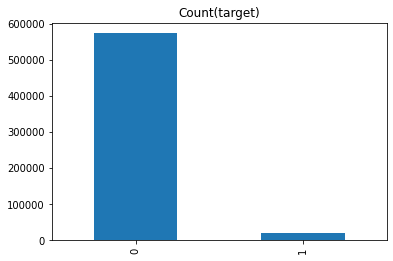

In [4]:
target_count.plot(kind='bar',title='Count(target)')

In [ ]:
labels= df_train.columns[2:]
X=df_train[labels]
y = df_train['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=XGBClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f'Accuracy Score is :{round(accuracy_score(y_test,y_pred)*100,2)}%')

In [16]:
model= XGBClassifier()
model.fit(X_train[['ps_ind_01']],y_train)
y_pred=model.predict(X_test[['ps_ind_01']])
round(accuracy_score(y_test,y_pred)*100,2)

96.32

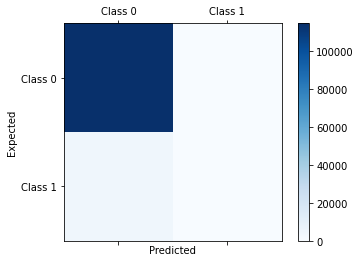

In [17]:
conf_mat = confusion_matrix(y_test,y_pred)
labels =['Class 0','Class 1']
fig= plt.figure()
ax= fig.add_subplot(111)
cax = ax.matshow(conf_mat,cmap = plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([' ']+labels)
ax.set_yticklabels([' ']+labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Random under_sampling

In [ ]:
count_class_0,count_class_1=df_train.target.value_counts()
df_class_0=df_train[df_train.target==0]
df_class_1=df_train[df_train.target==1]
df_class_0_under=df_class_0.sample(count_class_1)
df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)
df_test_under.target.value_counts().plot(kind='bar',title='Count (target)')

### Random over_sampling

In [ ]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)
df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)
df_test_over.target.value_counts().plot(kind='bar',title='Count (target)')

### Imbalanced - learn module

In [1]:
import imblearn

In [2]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

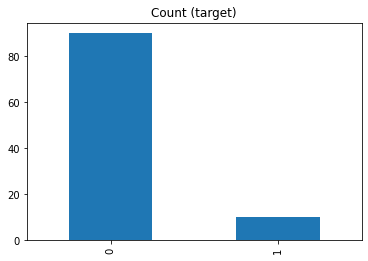

In [5]:
X,y=make_classification(
    n_classes=2,class_sep=1.5, weights=[0.9, 0.1],
 n_informative=3,n_redundant=1,flip_y=0,n_features=20,n_clusters_per_class=1,
 n_samples=100,random_state=10                                     )

df=pd.DataFrame(X)
df['target'] =y

df.target.value_counts().plot(kind='bar',title='Count (target)')

In [9]:
def plot_2d_space(X,y,label ='Classes'):
    colors =['#1F77B4', '#FF7F0E']
    markers =['o','s']
    for l,c,m in zip(np.unique(y),colors,markers):
        plt.scatter(X[y==l,0],X[y==l,1],
                   c=c,label=l,marker=m)
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [10]:
pca=PCA(n_components=2)
X=pca.fit_transform(X)

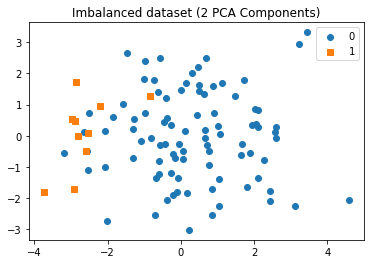

In [11]:
plot_2d_space(X,y,'Imbalanced dataset (2 PCA Components)')

In [12]:
from imblearn.under_sampling import RandomUnderSampler

In [13]:
rus=RandomUnderSampler(replacement=True)

In [14]:
X_rus,y_rus=rus.fit_sample(X,y)

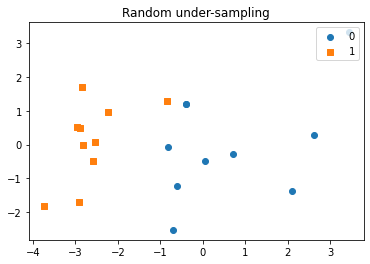

In [15]:
plot_2d_space(X_rus,y_rus,'Random under-sampling')

In [16]:
from imblearn.over_sampling import RandomOverSampler

In [17]:
ros=RandomOverSampler()

In [18]:
X_ros,y_ros=ros.fit_sample(X,y)

In [23]:
print(f'{X_ros.shape[0]-X.shape[0]} new random picked points')

80 new random picked points


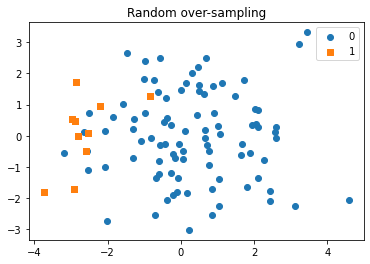

In [24]:
plot_2d_space(X_ros,y_ros,'Random over-sampling')

### Under -sampling: Tomek Links
- Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class.

In [25]:
from imblearn.under_sampling import TomekLinks

In [27]:
tl=TomekLinks(sampling_strategy='majority')

In [28]:
X_tl,y_tl=tl.fit_sample(X,y)

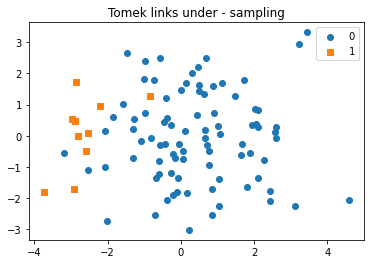

In [33]:
plot_2d_space(X_tl,y_tl,'Tomek links under - sampling')

In [34]:
from imblearn.under_sampling import ClusterCentroids

In [37]:
cc=ClusterCentroids()

In [39]:
X_cc,y_cc=cc.fit_sample(X,y)

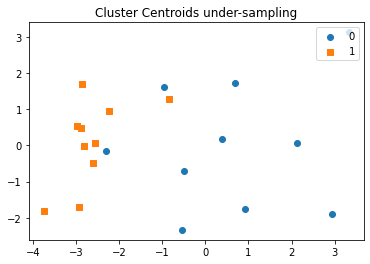

In [40]:
plot_2d_space(X_cc,y_cc,'Cluster Centroids under-sampling')

### Over -sampling :SMOTE (Synthetic Minority Oversampling Technique)

In [41]:
from imblearn.over_sampling import SMOTE

In [45]:
smote=SMOTE(sampling_strategy='minority')

In [46]:
X_sm,y_sm=smote.fit_sample(X,y)

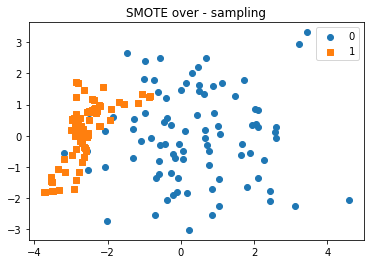

In [55]:
plot_2d_space(X_sm,y_sm,'SMOTE over - sampling')

In [56]:
from imblearn.combine import SMOTETomek

In [57]:
smt=SMOTETomek()

In [58]:
X_smt,y_smt=smt.fit_sample(X,y)

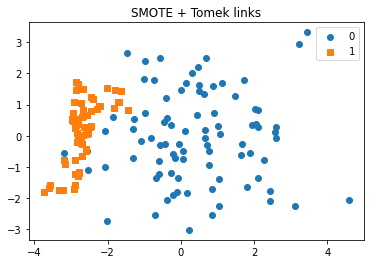

In [59]:
plot_2d_space(X_smt,y_smt,'SMOTE + Tomek links')

In [4]:
train_copy=df_train
train_copy=train_copy.replace(-1,np.NaN)

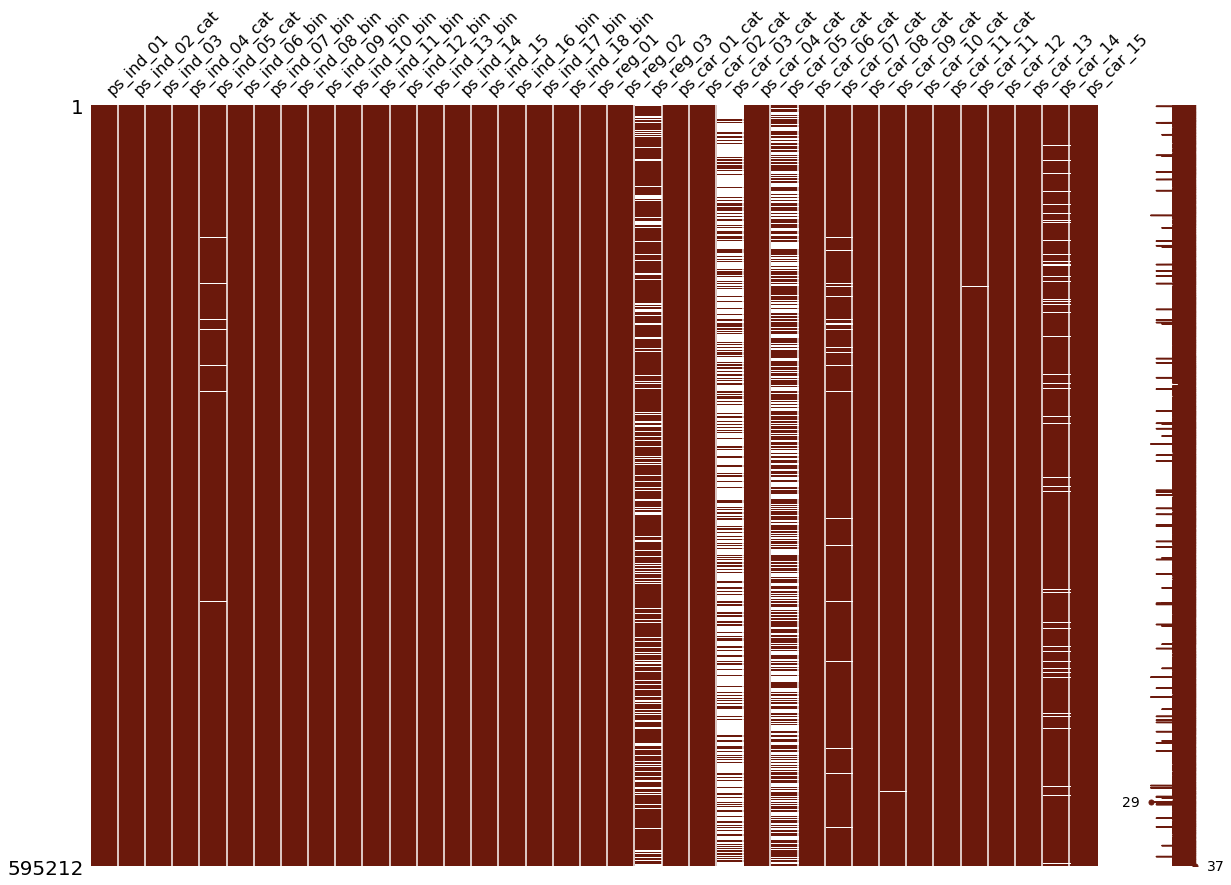

In [5]:
msno.matrix(df=train_copy.iloc[:,2:39],figsize=(20,14),color=(0.42, 0.1, 0.05))

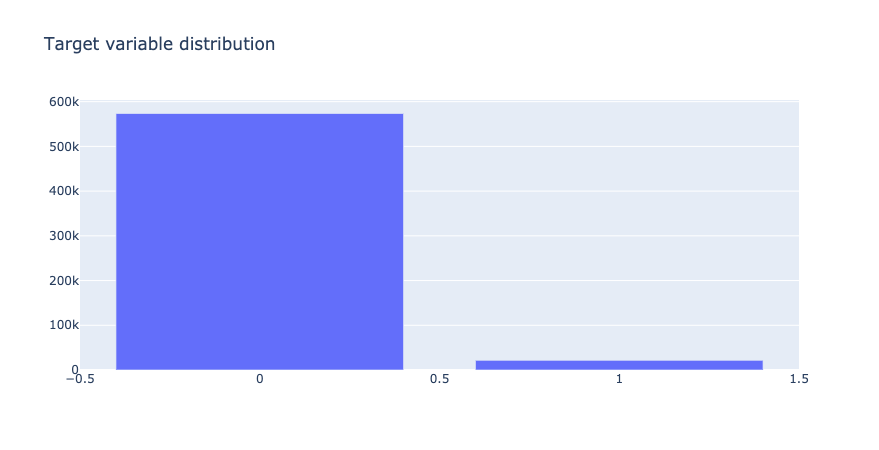

In [109]:
data=[go.Bar(x=df_train.target.value_counts().index.values,
   y=df_train.target.value_counts().values,
       text='Distribution of target variable')]
layout=go.Layout(title='Target variable distribution')
fig=go.Figure(data=data,layout=layout)
py.iplot(fig,filename='basic-bar')

In [7]:
Counter(df_train.dtypes)

Counter({dtype('int64'): 49, dtype('float64'): 10})

In [8]:
train_float=df_train.select_dtypes(include=['float64'])
train_int=df_train.select_dtypes(include=['int64'])

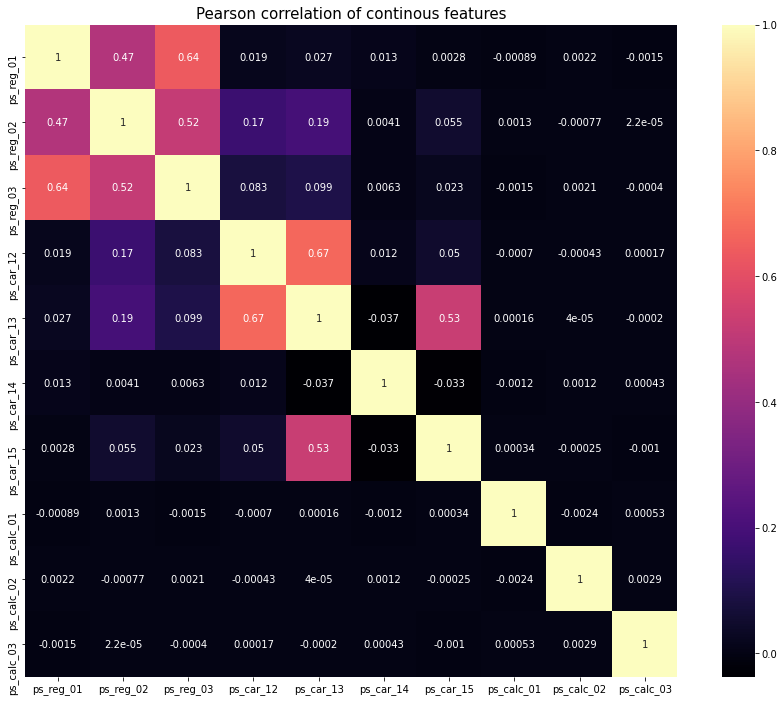

In [9]:
colormap=plt.cm.magma
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continous features',size=15)
sns.heatmap(train_float.corr(),square=True,cmap=colormap,annot=True)

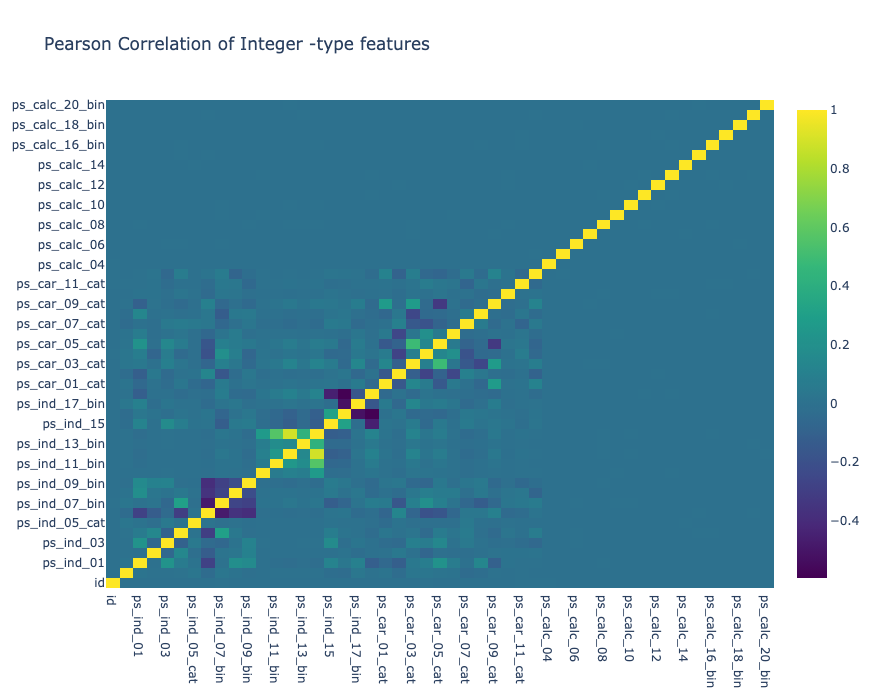

In [24]:
data=[go.Heatmap(z=train_int.corr().values,x=train_int.columns.values,y=train_int.columns.values,
          colorscale='Viridis',opacity=1.0)]
layout=go.Layout(title='Pearson Correlation of Integer -type features',
 xaxis = dict(ticks='',nticks=36) ,
          yaxis=dict(ticks=''),
          width =900,height=700  )

fig=go.Figure(data=data,layout=layout)
py.iplot(fig,filename='labelled -heatmap')

In [6]:
bin_col=[col for col in df_train.columns if '_bin' in col]
zero_list=[]
one_list=[]
for col in bin_col:
    zero_list.append((df_train[col]==0).sum())
    one_list.append((df_train[col]==1).sum())

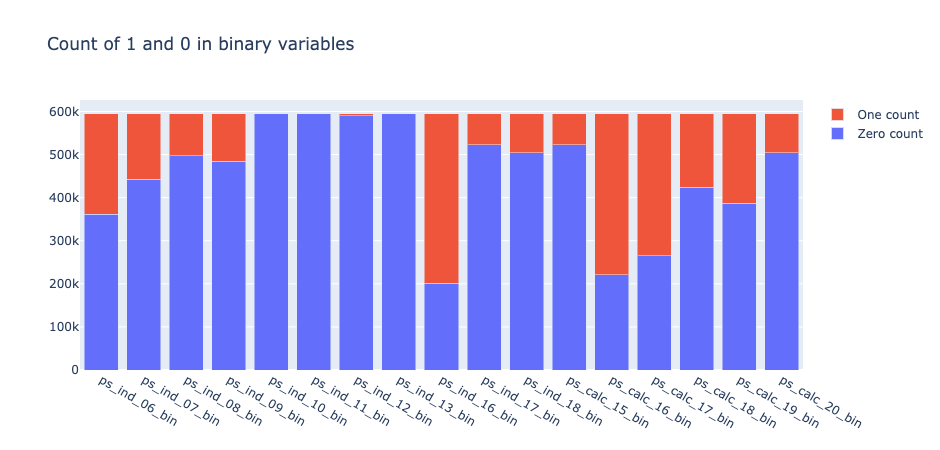

In [7]:
trace1=go.Bar(x=bin_col,y=zero_list,name='Zero count')
trace2=go.Bar(x=bin_col,y=one_list,name='One count')
data=[trace1,trace2]
layout =go.Layout(barmode='stack',
                 title='Count of 1 and 0 in binary variables')
fig = go.Figure(data=data,layout=layout)
py.iplot(fig,filename='stacked-bar')

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
rf=RandomForestClassifier(n_estimators=150,max_depth=8,min_samples_leaf=4,max_features=0.2,n_jobs=-1,random_state=0)
rf.fit(df_train.drop(['id','target'],axis=1),df_train.target)
features=df_train.drop(['id','target'],axis=1).columns.values

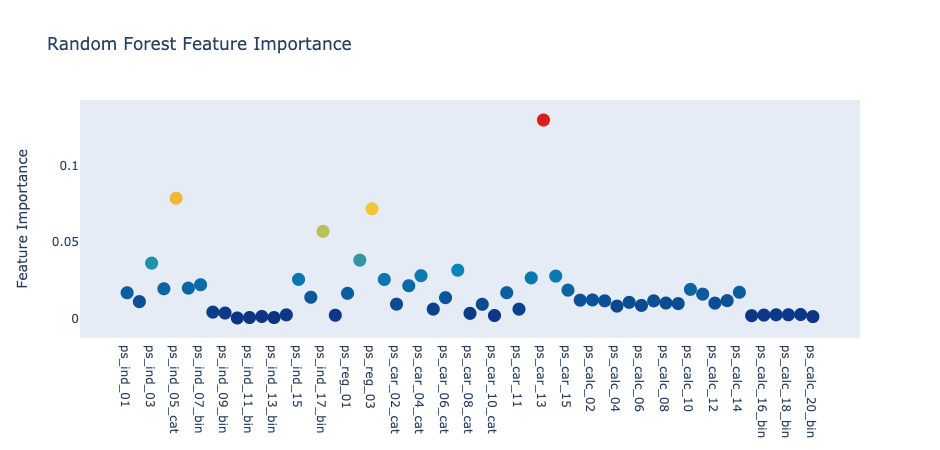

In [6]:
trace=go.Scatter(y=rf.feature_importances_,
          x=features,
          mode='markers',
          marker=dict(
          sizemode='diameter',
              sizeref=1,
              size=13,
              color=rf.feature_importances_,
              colorscale='Portland'    ),          
          text=features)
data=[trace]
layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig=go.Figure(data=data,layout=layout)

py.iplot(fig)

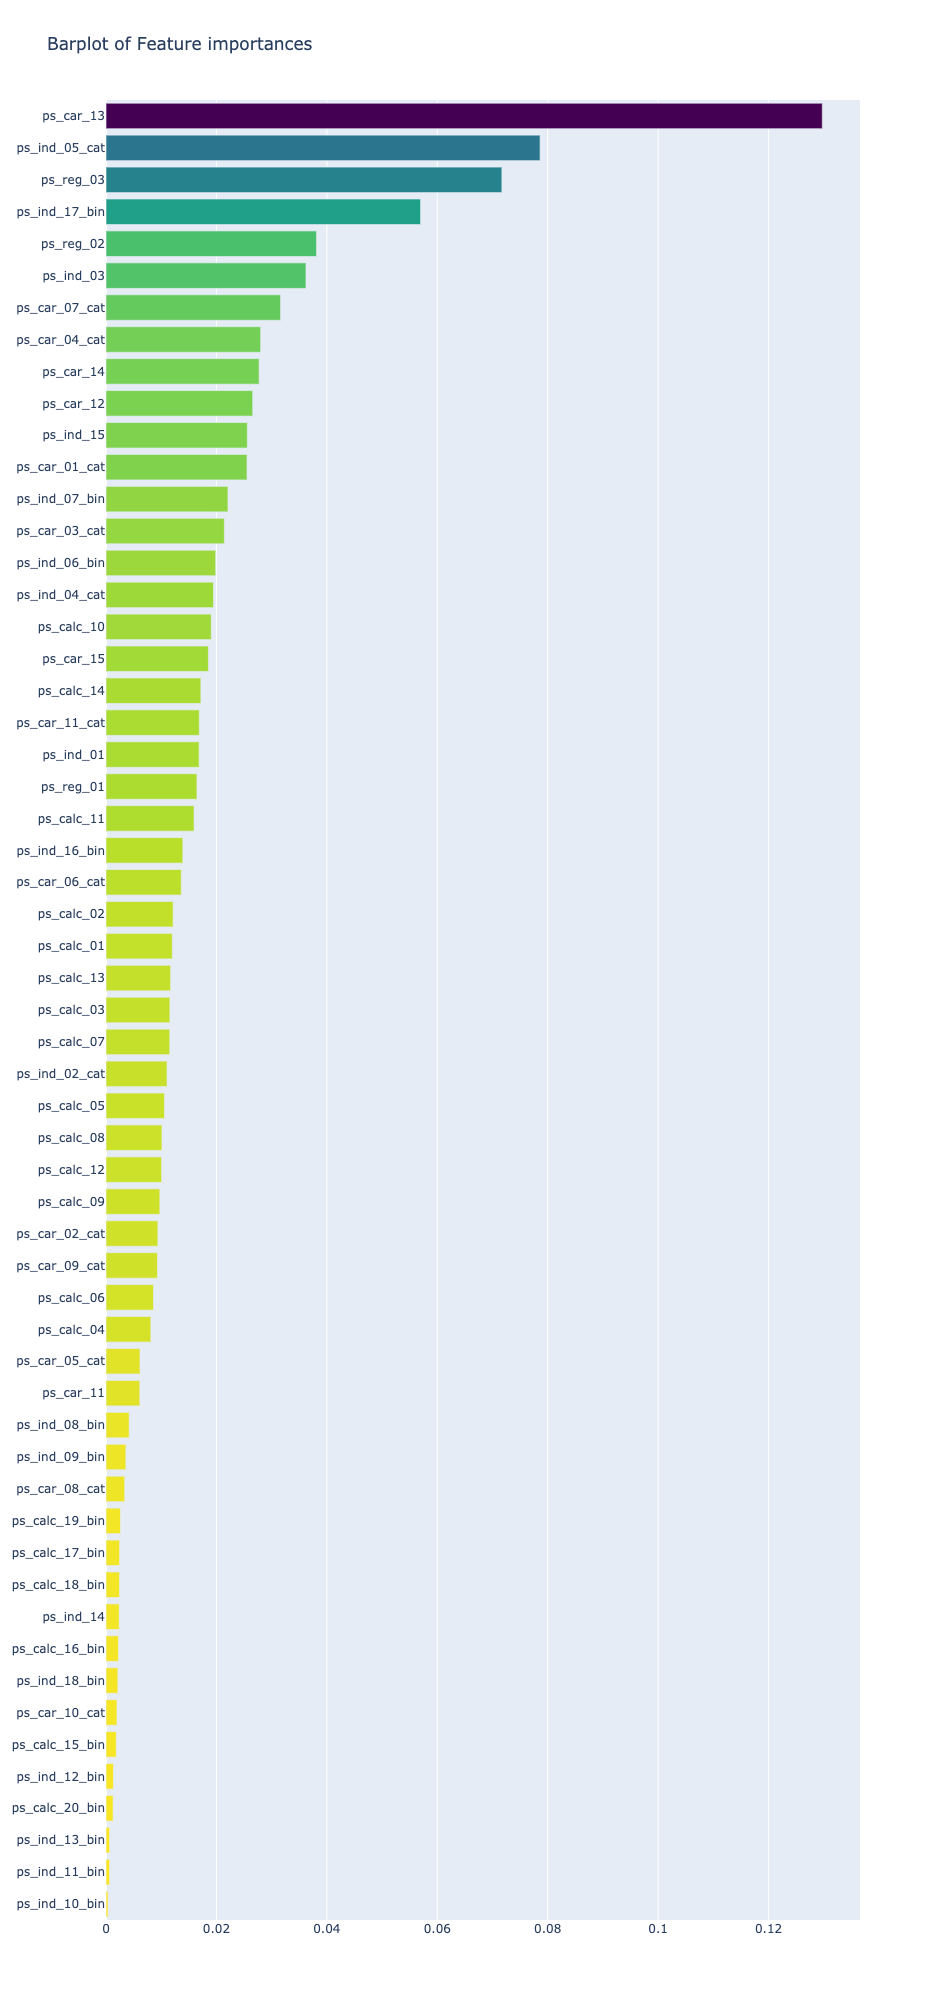

In [48]:
x,y=(list(x) for x in zip(*sorted(zip(rf.feature_importances_,features))))
trace2=go.Bar(x=x,y=y,
      marker=dict(
 color=x,colorscale='Viridis' ,reversescale = True  ),
       name='Random Forest Feature Importance',
       orientation='h')
layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True ))
fig1=go.Figure(data=[trace2])
fig1['layout'].update(layout)

py.iplot(fig1,filename='plots')

In [49]:
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image,ImageDraw,ImageFont
import re

In [54]:
decision_tree=tree.DecisionTreeClassifier(max_depth=3)

In [56]:
decision_tree.fit(df_train.drop(['id','target'],axis=1),df_train.target)

DecisionTreeClassifier(max_depth=3)

In [57]:
with open('tree1.dot','w') as f:
    f= tree.export_graphviz(decision_tree,out_file=f,
 max_depth=4,impurity=False,
feature_names=df_train.drop(['id','target'],axis=1).columns.values,
    class_names=['No','Yes'],
                            rounded=True,
                            filled=True  )

check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])
img=Image.open('tree1.png')
draw=ImageDraw.Draw(img)
img.save('sample-out.png')

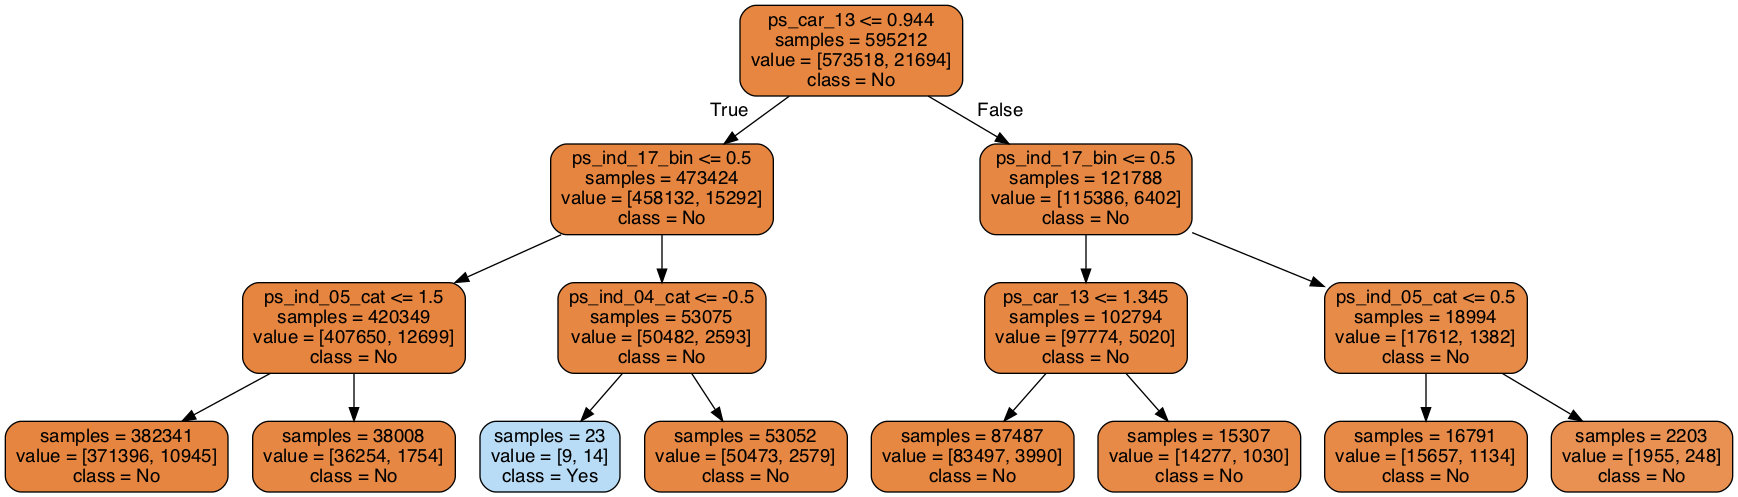

In [62]:
PImage('sample-out.png')

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
gb=GradientBoostingClassifier(n_estimators=100,max_depth=3,min_samples_leaf=4,
                          max_features=0.2,random_state=0)
gb.fit(df_train.drop(['id','target'],axis=1),df_train.target)
features=df_train.drop(['id','target'],axis=1).columns.values

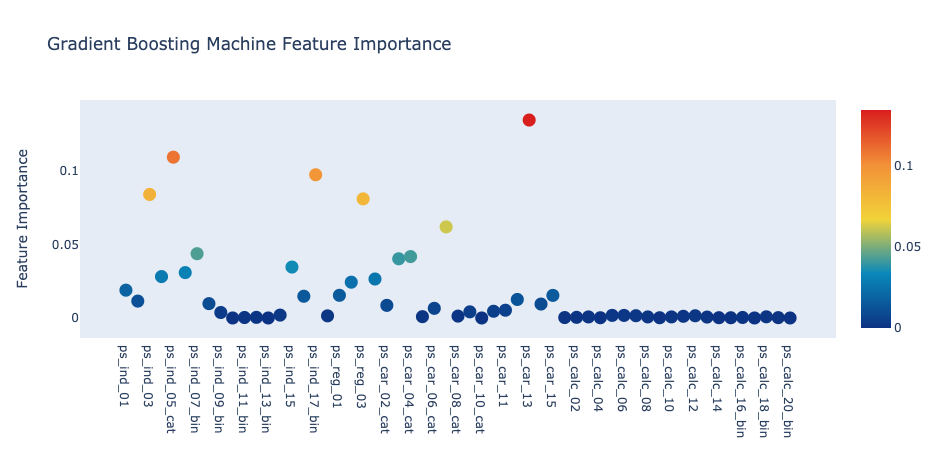

In [75]:
trace = go.Scatter(
    y = gb.feature_importances_,
    x = features,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = features
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Machine Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')